In [26]:
!pwd

/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/analysis/sim_analyze


In [1]:
import efel

from bluepy.v2 import Simulation

from bluepy.v2 import Circuit
from bluepy.v2 import Cell
from bluepy.v2.enums import Synapse

from os import path

import pandas as pd

import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import h5py

import pickle


In [2]:
sim_f = '/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/ina_pump_test/BlueConfig'

sim = Simulation(sim_f)

Invalid absolute path: /gpfs/bbp.cscs.ch/project/proj34/scratch/polina/test_22dec2020
Have keys ({'FlushBufferScalar'}) that are not defined for section: Run


In [3]:
#Report NaCurrCellSum
#    Target L5mc2MCTPCA
#    Type Summation

report = sim.report('NaCurrCellSum', source='h5') # NaCurrCellSum
NaCurrCellSum = report.get()
print("NUMBER OF COLUMNS:",len(NaCurrCellSum.columns))


Ignoring unknown key: 'FlushBufferScalar'


NUMBER OF COLUMNS: 2132


In [4]:
#Report NaCurrSoma
#    Target L5mc2MCTPCA
#    Type compartment
    
report = sim.report('NaCurrSoma', source='h5') # NaCurrentAllCmps
NaCurrSoma = report.get()
print("NUMBER OF COLUMNS:",len(NaCurrSoma.columns))

Ignoring unknown key: 'FlushBufferScalar'


NUMBER OF COLUMNS: 2132


In [5]:
#Report NaCurrCompSum
#    Target AllComps_l5s1
#    Type Summation


report = sim.report('NaCurrCompSum', source='h5')
NaCurrCompSum = report.get()
print("NUMBER OF COLUMNS:",len(NaCurrCompSum.columns))


Ignoring unknown key: 'FlushBufferScalar'


NUMBER OF COLUMNS: 1561041


In [ ]:
#Report NaPumpCurr
#    Target L5mc2MCTPCA
#    Type Summation
#    ReportOn ina_nakpump

report = sim.report('NaPumpCurr', source='h5')
NaPumpCurr = report.get()
print("NUMBER OF COLUMNS:",len(NaPumpCurr.columns))


In [7]:
report = sim.report('NaiConc', source='h5')
NaiConc = report.get()
print("NUMBER OF COLUMNS:",len(NaiConc.columns))


Ignoring unknown key: 'FlushBufferScalar'


NUMBER OF COLUMNS: 2132


In [8]:
NaiConc.head()

gid,147760,147761,147789,147792,147794,147796,147811,147813,147824,147826,...,162976,163006,163022,163027,163031,163038,163046,163050,163064,163089
time,,,,,,,,,,,,,,,,,,,,,
0.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
1.0,10.000003,10.000003,10.000003,10.000002,10.000004,10.000002,10.000002,10.000002,10.000004,10.000002,...,10.000000,9.999999,10.000000,10.000000,10.000000,10.000000,9.999996,9.999999,10.000000,10.000000
2.0,10.000076,10.000061,10.000060,10.000042,10.000510,10.000046,10.000073,10.000045,10.001858,10.000131,...,10.012213,10.000376,10.011769,10.001994,10.002009,10.005210,10.014446,10.002145,10.022003,10.001643
3.0,10.000299,10.000216,10.000212,10.000154,10.025025,10.000162,10.000349,10.000176,10.032715,10.000669,...,10.039114,10.019176,10.038795,10.034365,10.034360,10.027659,10.047392,10.027169,10.035409,10.020903
4.0,10.000826,10.000537,10.000517,10.000388,10.044354,10.000398,10.001140,10.000449,10.035497,10.002378,...,10.057878,10.034575,10.057644,10.050113,10.050092,10.040015,10.079044,10.041075,10.043444,10.031589


In [9]:
NaPumpCurr.head()

gid,147760,147761,147789,147792,147794,147796,147811,147813,147824,147826,...,162976,163006,163022,163027,163031,163038,163046,163050,163064,163089
time,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
1.0,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
2.0,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
3.0,0.000000e+00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000093,0.000000,0.000120,0.00000,0.000000,0.000037,0.049380,2.190607e-08,0.002976,1.362003e-08
4.0,1.554373e-07,0.000002,0.0,0.0,0.000315,0.000003,0.0,0.0,0.000819,0.0,...,0.000396,0.000284,0.000443,0.00036,0.000202,0.000326,0.050233,3.372050e-04,0.002980,1.769344e-04


In [10]:
NaCurrCellSum.head()

gid,147760,147761,147789,147792,147794,147796,147811,147813,147824,147826,...,162976,163006,163022,163027,163031,163038,163046,163050,163064,163089
time,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.0,-0.003826,-0.004771,-0.004572,-0.003658,-0.002767,-0.004426,-0.004780,-0.003058,-0.003906,-0.002472,...,-0.000069,0.000249,0.000146,-0.000031,-0.000027,-0.000031,0.000921,0.000160,-0.003127,-0.000048
2.0,-0.003826,-0.004771,-0.004572,-0.003658,-0.002767,-0.004426,-0.004780,-0.003058,-0.003906,-0.002472,...,-0.000069,0.000249,0.000146,-0.000031,-0.000027,-0.000031,0.000921,0.000160,-0.003127,-0.000048
3.0,-0.072735,-0.064705,-0.063490,-0.047936,-0.382805,-0.050477,-0.107620,-0.049684,-3.211172,-0.094349,...,-7.985650,-0.735297,-8.087740,-1.744700,-1.767667,-14.683567,-6.089647,-4.453546,-7.270594,-4.307183
4.0,-0.222321,-0.262775,-0.144265,-0.110580,-12.454349,-0.375627,-0.344761,-0.123087,-6.457428,-0.347824,...,-2.043803,-7.080361,-2.197310,-3.995423,-3.982758,-3.642169,0.078186,-4.354973,0.023488,-4.912426


In [11]:
# from iter seg in py
param = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/ina_pump_test/param_2020122220.txt',sep='\t',header=None)

param.columns = ['c_gid','rank','idxm','current_ina_nA','current_ina_origin_noScaling','nais_mean', 'volume_um3','nais_mean_noScaling']
param['c_gid'] = param['c_gid'].astype(int)
param['idxm'] = param['idxm'].astype(float)

In [12]:
param.head()

,c_gid,rank,idxm,current_ina_nA,current_ina_origin_noScaling,nais_mean,volume_um3,nais_mean_noScaling
0,150931,438,0.0,0.0,0.0,6.020001e+06,14336.061932,10.0
1,150861,428,0.0,0.0,0.0,6.020000e+06,15148.963062,10.0
2,150635,406,0.0,0.0,0.0,6.020000e+06,17784.284919,10.0
3,150920,436,0.0,0.0,0.0,6.020001e+06,10478.788264,10.0
4,150689,413,0.0,0.0,0.0,6.020001e+06,8848.972062,10.0


In [17]:
param['nais_mean'] = param['nais_mean']/(1e-3 * 1e-15 * 6.02e23)

In [14]:
NaiConc[147761].max()

10.427397727966309

In [15]:
param.loc[param['c_gid']==147761,'nais_mean'].max()

6288808.825302877

In [18]:
param.loc[param['c_gid']==147761,'nais_mean']

944       10.000001
3594      10.000016
5361      10.000067
6443      10.000757
9027      10.002966
11474     10.015346
14064     10.029831
15471     10.043695
17856     10.057537
19331     10.069371
21783     10.080147
23807     10.089756
27342     10.098414
29653     10.106721
31501     10.115822
33479     10.127275
34115     10.136978
36276     10.145620
38438     10.154231
41735     10.163298
44666     10.173388
44994     10.183269
47979     10.192391
49250     10.201648
51227     10.211392
54909     10.221186
56422     10.230499
59319     10.240380
60505     10.250291
62938     10.259991
65997     10.269642
66733     10.279235
68694     10.288599
71684     10.297764
74079     10.306943
76527     10.315977
77775     10.324925
79020     10.334062
82581     10.343796
83288     10.353906
86218     10.363955
88241     10.373692
90135     10.382842
92936     10.391851
94468     10.400987
97606     10.410297
98335     10.419784
101445    10.429091
103533    10.437999
105337    10.446526


In [19]:
np.corrcoef(param.loc[param['c_gid']==147761,'nais_mean_noScaling'],NaiConc[147761])

array([[1.        , 0.98768138],
       [0.98768138, 1.        ]])

In [21]:
np.corrcoef(param.loc[param['c_gid']==147761,'nais_mean'],NaiConc[147761],'pearson')

array([[1.        , 0.99274163],
       [0.99274163, 1.        ]])

In [22]:
prs = []
for i,gid in enumerate(param['c_gid'].unique()):
    pr = np.corrcoef(param.loc[param['c_gid']==gid,'nais_mean'],NaiConc[gid],'pearson')[0][1]
    prs.append(pr*100)

In [25]:
np.median(prs)

98.79493312958856

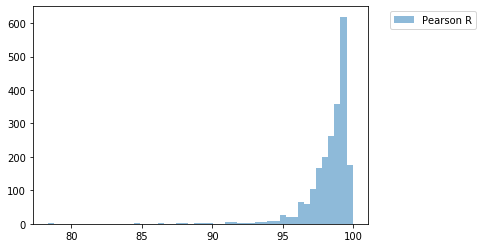

In [23]:
# gen met
bins = 50 #numpy.linspace(min(), 10, 100)

plt.hist(prs, bins=bins, alpha=0.5, label='Pearson R')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [14]:
np.corrcoef(param.loc[param['c_gid']==147761,'nais_mean'],NaiConc[147761])

array([[1.        , 0.98768138],
       [0.98768138, 1.        ]])

In [12]:
len(param.loc[param['current_ina_nA']!=0])/len(param)

0.9524108818011257

In [19]:
param.loc[param['c_gid']==147761,'current_ina_origin_noScaling'].max()

0.4733102035332674

In [20]:
param.loc[param['c_gid']==147761,'current_ina_nA'].max()

1.5003858040573556e-13

In [18]:
NaPumpCurr[147761].max()

0.14547507464885712

In [ ]:
NaPumpCurr[147761].min()

In [8]:
# check that all mpi ranks output data
len(param['rank'].unique())

1024

In [9]:
current_ina_nA = param.pivot(index='idxm', columns='c_gid', values='current_ina_nA')

In [10]:
current_ina_origin_noScaling = param.pivot(index='idxm', columns='c_gid', values='current_ina_origin_noScaling')

In [11]:
current_ina_nA.head()

c_gid,147760,147761,147789,147792,147794,147796,147811,147813,147824,147826,...,162976,163006,163022,163027,163031,163038,163046,163050,163064,163089
idxm,,,,,,,,,,,,,,,,,,,,,
0.0,-2.356995e-14,-3.621153e-14,-3.811826e-14,-4.713965e-14,-3.019494e-14,-3.505685e-14,-2.543569e-14,-3.847259e-14,-3.125212e-14,-2.897759e-14,...,-1.246892e-14,-3.775368e-14,-1.070329e-13,-4.072557e-14,-4.089569e-14,-3.146717e-14,-5.642699e-12,-7.166694e-14,-1.495253e-14,-3.559975e-14
1.0,-2.415063e-14,-3.741499e-14,-3.911523e-14,-4.796442e-14,-3.062866e-14,-3.648805e-14,-2.668025e-14,-3.900738e-14,-3.346913e-14,-2.935617e-14,...,-1.248229e-14,-4.097909e-14,-1.055954e-11,-6.565445e-14,-6.620055e-14,-3.296984e-14,-4.166243e-13,-1.667430e-11,-1.485439e-14,-3.654118e-14
2.0,-2.445118e-14,-3.792882e-14,-3.952248e-14,-4.805878e-14,-3.037458e-14,-3.705799e-14,-2.733753e-14,-3.906662e-14,-3.447536e-14,-2.934538e-14,...,-1.248964e-14,-4.189792e-14,-7.119499e-17,-8.128112e-12,-8.109960e-12,-3.168154e-14,-1.078784e-16,-5.962185e-14,-1.450602e-14,-3.667431e-14
3.0,-2.456489e-14,-3.820249e-14,-3.959483e-14,-4.788861e-14,-3.013717e-14,-3.730249e-14,-2.735418e-14,-3.877036e-14,-3.481065e-14,-2.922336e-14,...,-1.241973e-14,-4.228393e-14,-4.423731e-17,-6.132219e-13,-5.928999e-13,-2.445020e-14,-1.011859e-16,-3.106414e-16,-1.396558e-14,-3.662658e-14
4.0,-2.458771e-14,-3.849216e-14,-3.951426e-14,-4.753230e-14,-2.989289e-14,-3.748175e-14,-2.636555e-14,-3.843134e-14,-3.447885e-14,-2.900486e-14,...,-1.237078e-14,-4.269587e-14,-5.974833e-17,-1.145919e-14,-1.125613e-14,-1.904399e-14,-1.457575e-16,-3.371082e-16,-1.348743e-14,-3.607089e-14


In [12]:
current_ina_origin_noScaling.head()

c_gid,147760,147761,147789,147792,147794,147796,147811,147813,147824,147826,...,162976,163006,163022,163027,163031,163038,163046,163050,163064,163089
idxm,,,,,,,,,,,,,,,,,,,,,
0.0,-0.160468,-0.159459,-0.160119,-0.149955,-0.149311,-0.154695,-0.161719,-0.147015,-0.159177,-0.155417,...,-0.198837,-0.484355,-1.846408,-0.460048,-0.462009,-0.350510,-79.946602,-0.807793,-0.172195,-0.321119
1.0,-0.164471,-0.164821,-0.164332,-0.152594,-0.151452,-0.161078,-0.169763,-0.149077,-0.170439,-0.157475,...,-0.198966,-0.528896,-43.351501,-0.747137,-0.753510,-0.367944,-5.643083,-93.875719,-0.171086,-0.329685
2.0,-0.166572,-0.167122,-0.166058,-0.152902,-0.150195,-0.163628,-0.174058,-0.149314,-0.175551,-0.157436,...,-0.199011,-0.540873,-0.001053,-89.918351,-89.802987,-0.353590,-0.001570,-0.413588,-0.167088,-0.330727
3.0,-0.167378,-0.168341,-0.166369,-0.152366,-0.149022,-0.164724,-0.174249,-0.148186,-0.177252,-0.156790,...,-0.197865,-0.545092,-0.000651,-5.364713,-5.205487,-0.270395,-0.001479,-0.003359,-0.160823,-0.330153
4.0,-0.167553,-0.169633,-0.166036,-0.151236,-0.147815,-0.165526,-0.167879,-0.146894,-0.175565,-0.155615,...,-0.197044,-0.550130,-0.000889,-0.128128,-0.125786,-0.209181,-0.002172,-0.003576,-0.155307,-0.324878


In [14]:
NaCurrCellSum.head()

gid,147760,147761,147789,147792,147794,147796,147811,147813,147824,147826,...,162976,163006,163022,163027,163031,163038,163046,163050,163064,163089
time,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.0,-0.023570,-0.036212,-0.038118,-0.047140,-0.030195,-0.035057,-0.025436,-0.038473,-0.031252,-0.028977,...,-0.012469,-0.037754,-0.107033,-0.040726,-0.040896,-0.031467,-5.642692,-0.071667,-0.014953,-0.035600
2.0,-0.023570,-0.036212,-0.038118,-0.047140,-0.030195,-0.035057,-0.025436,-0.038473,-0.031252,-0.028977,...,-0.012469,-0.037754,-0.107033,-0.040726,-0.040896,-0.031467,-5.642692,-0.071667,-0.014953,-0.035600
3.0,-0.024151,-0.037415,-0.039115,-0.047964,-0.030629,-0.036488,-0.026680,-0.039007,-0.033469,-0.029356,...,-0.012482,-0.040979,-10.559533,-0.065654,-0.066201,-0.032970,-0.416624,-16.674309,-0.014854,-0.036541
4.0,-0.024451,-0.037929,-0.039522,-0.048059,-0.030375,-0.037058,-0.027338,-0.039067,-0.034475,-0.029345,...,-0.012490,-0.041898,-0.000071,-8.128112,-8.109953,-0.031682,-0.000108,-0.059622,-0.014506,-0.036674


In [13]:
NaCurrSoma.head()

gid,147760,147761,147789,147792,147794,147796,147811,147813,147824,147826,...,162976,163006,163022,163027,163031,163038,163046,163050,163064,163089
time,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1.0,-0.000004,-0.000004,-0.000004,-0.000004,-0.000004,-0.000004,-0.000004,-0.000004,-0.000004,-0.000004,...,-8.248523e-07,-8.751574e-07,-1.052132e-06,-1.270941e-07,-1.274838e-07,-1.252790e-07,-2.036757e-06,-1.016562e-06,-1.686080e-08,-1.260644e-07
2.0,-0.000004,-0.000005,-0.000004,-0.000004,-0.000004,-0.000004,-0.000004,-0.000004,-0.000005,-0.000004,...,-8.318569e-07,-9.124710e-07,-9.146413e-01,-1.507225e-07,-1.507437e-07,-1.314746e-07,-3.838708e-03,-8.919586e-01,-1.671544e-08,-1.307304e-07
3.0,-0.000004,-0.000005,-0.000004,-0.000004,-0.000004,-0.000005,-0.000005,-0.000004,-0.000005,-0.000004,...,-8.378337e-07,-9.370473e-07,-1.042433e-08,-1.549445e-03,-1.897843e-03,-1.238018e-07,-8.322361e-10,-2.826360e-03,-1.617932e-08,-1.320345e-07
4.0,-0.000004,-0.000005,-0.000004,-0.000004,-0.000004,-0.000005,-0.000005,-0.000004,-0.000005,-0.000004,...,-8.338370e-07,-9.635269e-07,-1.182896e-09,-1.841977e-02,-1.763710e-02,-9.477465e-08,-2.779904e-10,-3.438173e-08,-1.541138e-08,-1.323165e-07


In [15]:
NaCurrCompSum.head()

gid           147760                                                    \
Section.ID       0         1         1         1         1         1     
time                                                                     
0.0         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1.0        -0.000057 -0.003823 -0.003189 -0.002687 -0.002780 -0.002529   
2.0        -0.000057 -0.003823 -0.003189 -0.002687 -0.002780 -0.002529   
3.0        -0.000059 -0.003913 -0.003265 -0.002752 -0.002848 -0.002592   
4.0        -0.000060 -0.003958 -0.003303 -0.002785 -0.002882 -0.002624   

gid                                                 ... 163089                 \
Section.ID       2         2         2         2    ...    268  268  269  270   
time                                                ...                         
0.0         0.000000  0.000000  0.000000  0.000000  ...    0.0  0.0  0.0  0.0   
1.0        -0.002000 -0.001899 -0.001498 -0.001514  ...    0.0  0.0  0.0  0.0   
2.0        -0.002000 -0.001899 -0.001498 -0.001514  ...    0.0  0.0  0.0  0.0   
3.0        -0.002051 -0.001947 -0.001537 -0.001554  ...    0.0  0.0  0.0  0.0   
4.0        -0.002077 -0.001973 -0.001558 -0.001576  ...    0.0  0.0  0.0  0.0   

gid                                       
Section.ID  271  271  271  272  272  272  
time                                      
0.0         0.0  0.0  0.0  0.0  0.0  0.0  
1.0         0.0  0.0  0.0  0.0  0.0  0.0  
2.0         0.0  0.0  0.0  0.0  0.0  0.0  
3.0         0.0  0.0  0.0  0.0  0.0  0.0  
4.0         0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 1561041 columns]

In [17]:
NaCurrCompSum[147760].sum(axis=1) 

time
0.0      0.000000
1.0     -0.023570
2.0     -0.023570
3.0     -0.024151
4.0     -0.024451
5.0     -0.024588
6.0     -0.024522
7.0     -0.024532
8.0     -0.024448
9.0     -0.024330
10.0    -0.024241
11.0   -40.370903
12.0    -8.949965
13.0    -5.490816
14.0    -5.613426
15.0    -1.894217
16.0    -0.597193
17.0    -0.848392
18.0    -1.462304
19.0    -1.462304
20.0    -2.156601
21.0    -2.184923
22.0    -1.775555
23.0    -1.561443
24.0    -1.524374
25.0    -1.522783
26.0    -1.506038
27.0    -1.478736
28.0    -1.453122
29.0    -1.418607
30.0    -1.409420
31.0    -1.399726
32.0    -1.405690
33.0    -1.415238
34.0    -1.521330
35.0    -1.522844
36.0    -1.447478
37.0    -1.340318
38.0    -1.268584
39.0    -1.223490
40.0    -1.199122
41.0    -1.176054
42.0    -1.160921
43.0    -1.149752
44.0    -1.129722
45.0    -1.154018
46.0    -1.218954
47.0    -1.285397
48.0    -1.378017
49.0    -2.068090
dtype: float32

In [24]:
NaCurrCellSum[147826]-current_ina_nA[147826]

time
0.0     2.897759e-14
1.0    -2.897743e-02
2.0    -2.897743e-02
3.0    -2.935601e-02
4.0    -2.934522e-02
5.0    -2.900470e-02
6.0    -2.824314e-02
7.0    -2.730155e-02
8.0    -2.640894e-02
9.0    -2.577675e-02
10.0   -2.515906e-02
11.0   -3.393483e+01
12.0   -3.809870e+00
13.0   -2.039355e+00
14.0   -1.063749e+01
15.0   -2.239973e+00
16.0   -2.366463e-01
17.0   -1.468707e-01
18.0   -1.411027e-01
19.0   -1.411027e-01
20.0   -1.435847e-01
21.0   -1.497293e-01
22.0   -1.617642e-01
23.0   -1.748336e-01
24.0   -1.927604e-01
25.0   -2.189718e-01
26.0   -2.591981e-01
27.0   -3.259375e-01
28.0   -4.519376e-01
29.0   -8.296843e-01
30.0   -3.066003e+01
31.0   -2.869883e+00
32.0   -3.593248e-01
33.0   -9.326262e-02
34.0   -4.927126e-02
35.0   -3.469477e-02
36.0   -2.893674e-02
37.0   -2.661628e-02
38.0   -2.573627e-02
39.0   -2.526584e-02
40.0   -2.489553e-02
41.0   -2.403346e-02
42.0   -2.467493e-02
43.0   -2.548288e-02
44.0   -2.578519e-02
45.0   -2.535001e-02
46.0   -2.466008e-02
47.0   -

In [25]:
NaCurrCellSum[147826]-current_ina_origin_noScaling[147826]

time
0.0      0.155417
1.0      0.128497
2.0      0.128458
3.0      0.127434
4.0      0.126270
5.0      0.122527
6.0      0.118222
7.0      0.114357
8.0      0.111851
9.0      0.109158
10.0    82.026204
11.0   -18.654189
12.0     2.561019
13.0    31.617405
14.0    -3.930324
15.0    -1.220077
16.0     0.451420
17.0     0.561952
18.0     0.594225
19.0     0.625989
20.0     0.677501
21.0     0.731395
22.0     0.802683
23.0     0.912504
24.0     1.084021
25.0     1.373027
26.0     1.932686
27.0     3.738499
28.0    43.910859
29.0    11.195130
30.0   -29.142058
31.0    -2.335128
32.0    -0.057735
33.0     0.112064
34.0     0.117974
35.0     0.117269
36.0     0.117188
37.0     0.116117
38.0     0.114100
39.0     0.109451
40.0     0.111944
41.0     0.115124
42.0     0.114067
43.0     0.109581
44.0     0.104811
45.0     0.100951
46.0     0.097889
47.0     0.095312
48.0     0.093181
49.0     0.090997
Name: 147826, dtype: float64

In [19]:
NaCurrSoma[147826]-current_ina_nA[147826]

time
0.0     2.897759e-14
1.0    -3.991495e-06
2.0    -4.064277e-06
3.0    -4.066570e-06
4.0    -4.046728e-06
5.0    -4.010249e-06
6.0    -3.864097e-06
7.0    -3.690054e-06
8.0    -3.527290e-06
9.0    -3.408671e-06
10.0   -3.296222e-06
11.0   -1.504089e+00
12.0   -5.246579e-03
13.0   -2.971611e-02
14.0   -4.421218e-01
15.0   -8.036421e-02
16.0   -4.929295e-05
17.0   -8.309913e-05
18.0   -1.274363e-04
19.0   -1.567261e-04
20.0   -1.777925e-04
21.0   -2.126005e-04
22.0   -2.415784e-04
23.0   -2.804144e-04
24.0   -3.384861e-04
25.0   -4.329631e-04
26.0   -6.031616e-04
27.0   -9.547724e-04
28.0   -2.033416e-03
29.0   -2.031371e+00
30.0   -1.723516e-02
31.0   -4.441762e-06
32.0   -2.649321e-06
33.0   -2.332541e-06
34.0   -2.207641e-06
35.0   -2.257156e-06
36.0   -2.434143e-06
37.0   -2.646660e-06
38.0   -2.823829e-06
39.0   -2.953531e-06
40.0   -2.819046e-06
41.0   -2.674638e-06
42.0   -2.772729e-06
43.0   -2.928565e-06
44.0   -2.985580e-06
45.0   -3.024780e-06
46.0   -3.013421e-06
47.0   -

In [20]:
NaCurrSoma[147826]-current_ina_origin_noScaling[147826]

time
0.0      0.155417
1.0      0.157471
2.0      0.157432
3.0      0.156786
4.0      0.155611
5.0      0.151527
6.0      0.146461
7.0      0.141654
8.0      0.138256
9.0      0.134931
10.0    82.051360
11.0    13.776552
12.0     6.365642
13.0    33.627044
14.0     6.265044
15.0     0.939532
16.0     0.688017
17.0     0.708739
18.0     0.735201
19.0     0.766935
20.0     0.820908
21.0     0.880912
22.0     0.964206
23.0     1.087057
24.0     1.276442
25.0     1.591566
26.0     2.191281
27.0     4.063482
28.0    44.360763
29.0     9.993443
30.0     1.500735
31.0     0.534751
32.0     0.301587
33.0     0.205324
34.0     0.167243
35.0     0.151961
36.0     0.146123
37.0     0.142731
38.0     0.139833
39.0     0.134714
40.0     0.136837
41.0     0.139155
42.0     0.138739
43.0     0.135061
44.0     0.130593
45.0     0.126298
46.0     0.122546
47.0     0.119219
48.0     0.116370
49.0     0.113498
Name: 147826, dtype: float64

In [23]:
NaCurrCompSum[147826].sum(axis=1)-current_ina_nA[147826]

time
0.0     2.897759e-14
1.0    -2.897743e-02
2.0    -2.897743e-02
3.0    -2.935600e-02
4.0    -2.934522e-02
5.0    -2.900470e-02
6.0    -2.824314e-02
7.0    -2.730155e-02
8.0    -2.640894e-02
9.0    -2.577675e-02
10.0   -2.515906e-02
11.0   -3.393483e+01
12.0   -3.809870e+00
13.0   -2.039355e+00
14.0   -1.063749e+01
15.0   -2.239973e+00
16.0   -2.366463e-01
17.0   -1.468707e-01
18.0   -1.411027e-01
19.0   -1.411027e-01
20.0   -1.435847e-01
21.0   -1.497293e-01
22.0   -1.617643e-01
23.0   -1.748336e-01
24.0   -1.927604e-01
25.0   -2.189718e-01
26.0   -2.591981e-01
27.0   -3.259375e-01
28.0   -4.519377e-01
29.0   -8.296843e-01
30.0   -3.066003e+01
31.0   -2.869883e+00
32.0   -3.593248e-01
33.0   -9.326262e-02
34.0   -4.927126e-02
35.0   -3.469477e-02
36.0   -2.893674e-02
37.0   -2.661628e-02
38.0   -2.573627e-02
39.0   -2.526584e-02
40.0   -2.489553e-02
41.0   -2.403346e-02
42.0   -2.467493e-02
43.0   -2.548288e-02
44.0   -2.578519e-02
45.0   -2.535001e-02
46.0   -2.466008e-02
47.0   -

In [22]:
NaCurrCompSum[147826].sum(axis=1)-current_ina_origin_noScaling[147826]

time
0.0      0.155417
1.0      0.128497
2.0      0.128458
3.0      0.127434
4.0      0.126270
5.0      0.122527
6.0      0.118222
7.0      0.114357
8.0      0.111851
9.0      0.109158
10.0    82.026204
11.0   -18.654189
12.0     2.561019
13.0    31.617405
14.0    -3.930323
15.0    -1.220077
16.0     0.451420
17.0     0.561952
18.0     0.594225
19.0     0.625989
20.0     0.677501
21.0     0.731395
22.0     0.802683
23.0     0.912504
24.0     1.084021
25.0     1.373027
26.0     1.932686
27.0     3.738499
28.0    43.910859
29.0    11.195130
30.0   -29.142058
31.0    -2.335128
32.0    -0.057735
33.0     0.112064
34.0     0.117974
35.0     0.117269
36.0     0.117188
37.0     0.116117
38.0     0.114100
39.0     0.109451
40.0     0.111944
41.0     0.115124
42.0     0.114067
43.0     0.109581
44.0     0.104811
45.0     0.100951
46.0     0.097889
47.0     0.095312
48.0     0.093181
49.0     0.090997
dtype: float64